# Visión por Computador: clasificación mediante kNN

Vamos a programar un clasificador de imágenes de CIFAR-10 utilizando el método de "k vecinos más cercanos"

##Preparación de los datos

Aunque aún no estemos trabajando con Machine Learning, vamos a utilizar Keras para descargar el dataset que queremos: el CIFAR-10 dataset, un conjunto de 60.000 imágenes de 32x32 en RGB previamente clasificados. Un ejemplo de este dataset sería la una imagen de un caballo acompañado de si etiqueta "Caballo" correspondiente.

Aunque 60.000 imágenes puedan parecer demasiadas, tenemos que tener en cuenta que este problema es tiene muchas variables y matices importantes.

Cuando realizamos problemas complejos, es típico dividir nuestros datos en dos: datos de entrenamiento y datos de validación (training set y validation set)
* Los datos de entrenamiento son los que utilizaremos para ajustar nuestros parámetros
* Los de validación, serán datos nunca antes vistos, que utilizaremos para evaluar el rendimiento de nuestra solución. 

Esto permite tener un conjunto de datos separado que nos diga cómo se comporta nuestro algoritmo ante entradas nunca vistas.

En este caso, las entradas serán imágenes de 32x32 en color, teniendo cada píxel un valor en el rango ([0-255], [0-255], [0-255]).

In [3]:
#Trabajo hecho por Jorge Giménez García.
import matplotlib.pyplot as plt
import numpy as np
import cv2

batch_size = 64

from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Visualizamos una muestra de los datos de entrenamiento

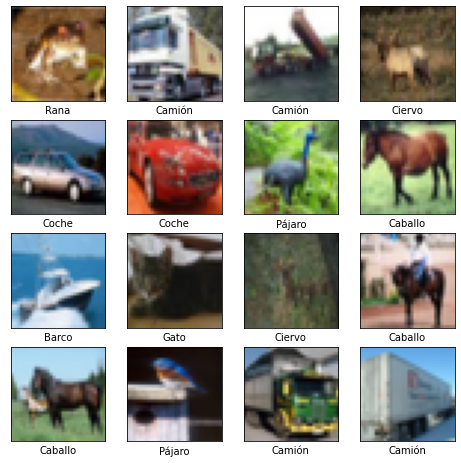

In [ ]:
classes = [
           'Avión',
           'Coche',
           'Pájaro',
           'Gato',
           'Ciervo',
           'Perro',
           'Rana',
           'Caballo',
           'Barco',
           'Camión'
]
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(classes[int(y_train[i])])
plt.show()

## Definición de las funciones de distancia:

Vamos a crear tres funciones de distancia que nos midan cómo de distintas son dos imágenes. En este ejemplo, la función distance_0 mide cómo de diferente es el color medio de las dos imágenes, pero tenéis que implementar otras tres funciones similares utilizando otros criterios.

Es importante que el rango de valores que devuelvan estas funciones sea igual, normalmente querremos que su resultado esté entre 0, para imágenes idénticas, hasta 255 en el caso opuesto.

### Funciones nn y knn

La función predict_nn utiliza nearest_neighbour para clasificar la imágen. Tenéis que implementar knn para hacer lo mismo utilizando knn

In [4]:
def distance_0(img_a, img_b):
  return abs(np.mean(img_a) - np.mean(img_b))

def distance_1(img_a, img_b):
  a = cv2.cvtColor(img_a, cv2.COLOR_RGB2GRAY)
  b = cv2.cvtColor(img_b, cv2.COLOR_RGB2GRAY)
  # convertimos las imagenes a bn

  return 0

#Euclidia
def distance_2(img_a, img_b):
  euclidia= np.sqrt(np.sum((img_a - img_b) ** 2))
  return euclidia
#Manhattan
def distance_3(img_a, img_b):
  manhattan=np.sum(np.abs(img_a - img_b))
  return manhattan

def predict_nn(img):
  # Función de nearest neighbor
  best_index = -1
  best = 255
  for i, x in enumerate(x_train):
    dif = distance_0(img, x)
    if dif < best:
      best_index = i
      best = dif
  return int(y_train[best_index])


def predict_knn(img, k,distancia):
  distancia_imagenes=list()
  vecinos=list()


  for i,x in enumerate(x_train):
    #Para hacer los calculos con las operaciones distintas de distancia
    if distancia==0:
      distancia_imagenes.append((i,distance_0(img,x)))
    elif distancia==1:
      distancia_imagenes.append((i,distance_2(img,x)))

    elif distancia==2:
      distancia_imagenes.append((i,distance_3(img,x)))

  
  #[1]== distancia y temporal es la tupla de distancia
  distancia_imagenes.sort(key=lambda temp:temp[1],reverse=True)
  
  for i in range(k):
    vecinos.append(distancia_imagenes[i][0])
  
  prediccion=max(set(vecinos),key=vecinos.count)

  return int(y_train[prediccion])

## Verificación visual

Mostramos en pantalla 16 números del conjunto de datos de validación junto a su predicción y su label real. En caso de ver alguna predicción incorrecta, os parece razonable que nuestra red de neuronas se haya equivocado?

Precisión de las predicciones: 6.25%


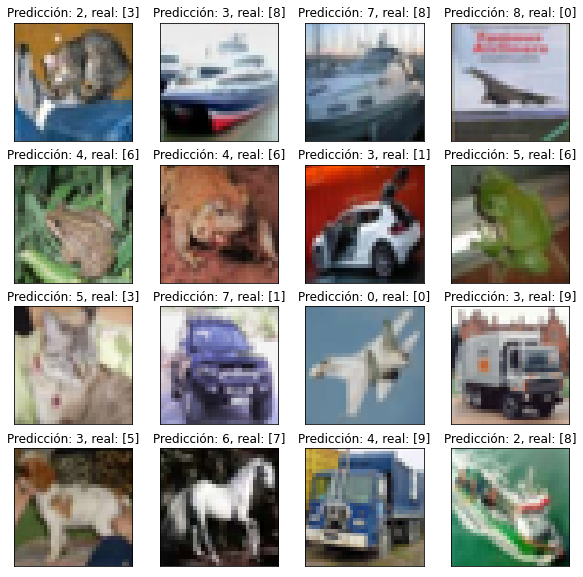

In [ ]:
ok_predictions = 0
plt.figure(figsize=(10, 10))
for i in range(16):
  img = x_test[i]
  prediction = predict_nn(img)
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  if prediction == y_test[i]:
    ok_predictions += 1
  plt.title(f'Predicción: {prediction}, real: {y_test[i]}')
print(f'Precisión de las predicciones: {100 * ok_predictions/16}%')

# Generación de una gráfica

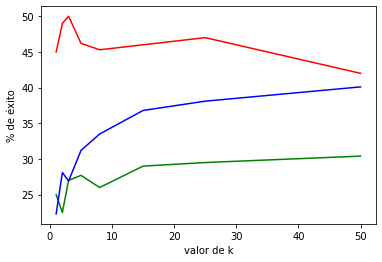

In [ ]:
# Ejemplo de cómo pintar una gráfica como la pedida, únicamente tenéis que
# sustituir los datos de acc1, acc2 y acc3 por los datos reales de vuestra
# solución, conteniendo estos arrays la precisión para cada valor de k de
# cada una de las funciones de distancia implementadas

k = [1, 2, 3, 5, 8, 15, 25, 50]
acc1 = [45, 49, 50, 46.2, 45.3, 46, 47, 42]
acc2 = [25, 22.5, 27, 27.7, 26, 29, 29.5, 30.4]
acc3 = [22.3, 28.1, 26.9, 31.2, 33.5, 36.8, 38.1, 40.1]

plt.plot(k, acc1, 'r-', k, acc2, 'g-', k, acc3, 'b-')
plt.ylabel('% de éxito')
plt.xlabel('valor de k')
plt.show()

b = ['1','2','3', '4','5']
b[:-5]
b.insert(3, '4')
# TODO: Mostrar resultados reales

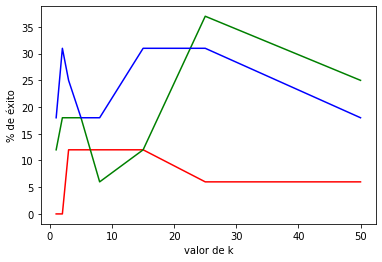

In [5]:
def funcion_precision(n_k,n_imagenes,distancia):
  #Acuerdate de que k es un array
  precision=[]

  for k in n_k:
    predicciones_validas=0

    for i in range(n_imagenes):
      img=x_test[i]
      prediccion= predict_knn(img,k,distancia)

      if prediccion == y_test[i]:
        predicciones_validas+=1

    precision.append(int(100*predicciones_validas/16))

  return precision

#Esto es parecido a lo que da alvaro
n_k = [1, 2, 3, 5, 8, 15, 25, 50]
precision1=[]
precision2=[]
precision3=[]

precision1=funcion_precision(n_k,16,0)
precision2=funcion_precision(n_k,16,1)
precision3=funcion_precision(n_k,16,2)

plt.plot(n_k, precision1, 'r-', n_k, precision2, 'g-', n_k, precision3, 'b-')
plt.ylabel('% de éxito')
plt.xlabel('valor de k')
plt.show()

b = ['1','2','3', '4','5']
b[:-5]
b.insert(3, '4')
# TODO: Mostrar resultados reales

